In [90]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
iris = datasets.load_iris()

In [92]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [93]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [94]:
# concatenate
concat = np.column_stack((iris.data, iris.target))

In [95]:
col_names = iris.feature_names
col_names.append('target')

In [96]:
df = pd.DataFrame(concat, columns = col_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [97]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [98]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object

In [99]:
df['sepal length (cm)'] = df['sepal length (cm)'].replace(4.6, np.NaN)

In [100]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,146.000000,150.000000,150.000000,150.000000,150.000000
mean,5.877397,3.057333,3.758000,1.199333,1.000000
std,0.812894,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.125000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [101]:
df.isna().sum()

sepal length (cm)    4
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [102]:
df['target'] = df.target.astype('category')

In [103]:
df.dtypes

sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
target               category
dtype: object

In [104]:
df.describe() # only does it for int and float types

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,146.000000,150.000000,150.000000,150.000000
mean,5.877397,3.057333,3.758000,1.199333
std,0.812894,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.125000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [105]:
df['target'].value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

In [106]:
corr = df.corr() # correlate all of them together
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.095895,0.864339,0.808421
sepal width (cm),-0.095895,1.000000,-0.428440,-0.366126
petal length (cm),0.864339,-0.428440,1.000000,0.962865
petal width (cm),0.808421,-0.366126,0.962865,1.000000


In [107]:
df['target'] = df.target.astype('float64')

In [108]:
corr_all = df.corr() # correlate all of them together
corr_all

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.095895,0.864339,0.808421,0.771916
sepal width (cm),-0.095895,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.864339,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.808421,-0.366126,0.962865,1.000000,0.956547
target,0.771916,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

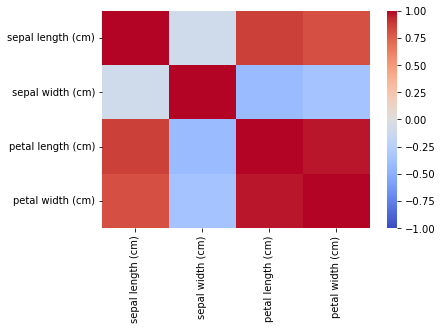

In [113]:
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1)

In [115]:
df.groupby('target').count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0.0,46,50,50,50
1.0,50,50,50,50
2.0,50,50,50,50


In [117]:
df.groupby('target').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0.0,5.041304,3.428,1.462,0.246
1.0,5.936000,2.770,4.260,1.326
2.0,6.588000,2.974,5.552,2.026


In [119]:
df.groupby('target').agg(['mean', 'count'])

sepal length (cm)       sepal width (cm)       petal length (cm)        \
                    mean count             mean count              mean count   
target                                                                          
0.0             5.041304    46            3.428    50             1.462    50   
1.0             5.936000    50            2.770    50             4.260    50   
2.0             6.588000    50            2.974    50             5.552    50   

       petal width (cm)        
                   mean count  
target                         
0.0               0.246    50  
1.0               1.326    50  
2.0               2.026    50

<AxesSubplot:ylabel='Frequency'>

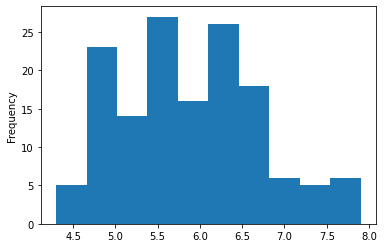

In [125]:
df['sepal length (cm)'].plot.hist(bins=10)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='Count'>

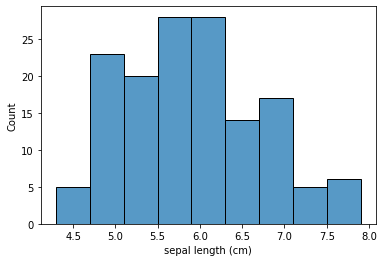

In [140]:
sns.histplot(df['sepal length (cm)'])

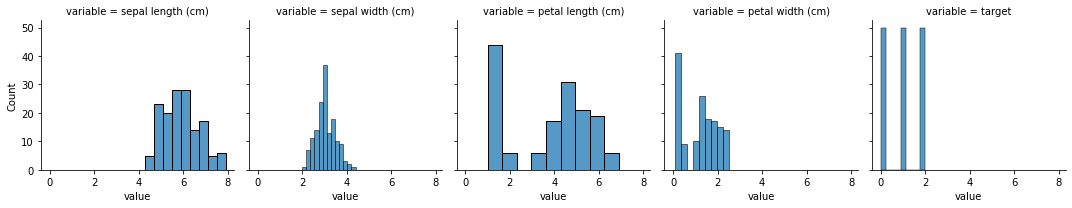

In [151]:
f = pd.melt(df) # from 
g = sns.FacetGrid(f, col="variable") #creates empty subplots
g = g.map(sns.histplot, "value") # fills in (or sns.distplot)

In [155]:
f.head()

,variable,value
0,sepal length (cm),5.1
1,sepal length (cm),4.9
2,sepal length (cm),4.7
3,sepal length (cm),NaN
4,sepal length (cm),5.0


/Users/magdadubois/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


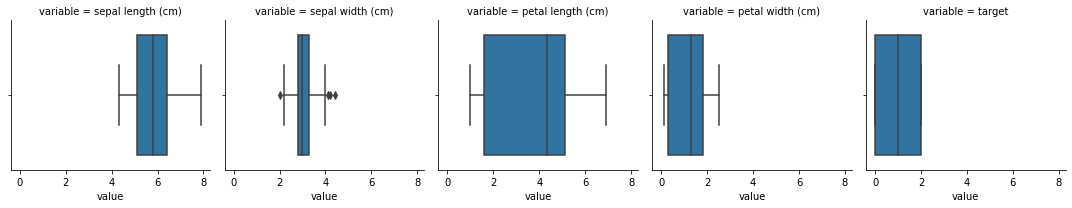

In [152]:
g = sns.FacetGrid(f, col="variable") #creates empty subplots
g = g.map(sns.boxplot, "value")

/Users/magdadubois/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


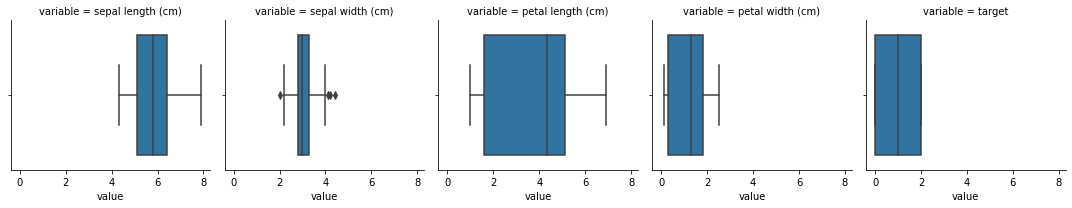

In [159]:
f = pd.melt(df)
g = sns.FacetGrid(f, col="variable") #creates empty subplots
g = g.map(sns.boxplot, "value")